<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Home_ID                   4000 non-null   int64  
 1   State                     4000 non-null   object 
 2   City                      4000 non-null   object 
 3   Month                     4000 non-null   int64  
 4   Avg_Daily_Temp            4000 non-null   float64
 5   Area_sqm                  4000 non-null   float64
 6   Occupants                 3958 non-null   float64
 7   Has_Solar_Panels          4000 non-null   int64  
 8   Has_Battery_Storage       4000 non-null   int64  
 9   Energy_Efficiency_Rating  4000 non-null   object 
 10  Appliance_Efficiency      3956 non-null   float64
 11  Monthly_Consumption_kWh   3965 non-null   float64
 12  Monthly_Cost              4000 non-null   float64
dtypes: float64(6), int64(4), object(3)
memory usage: 406.4+ KB


<Figure size 1200x600 with 0 Axes>

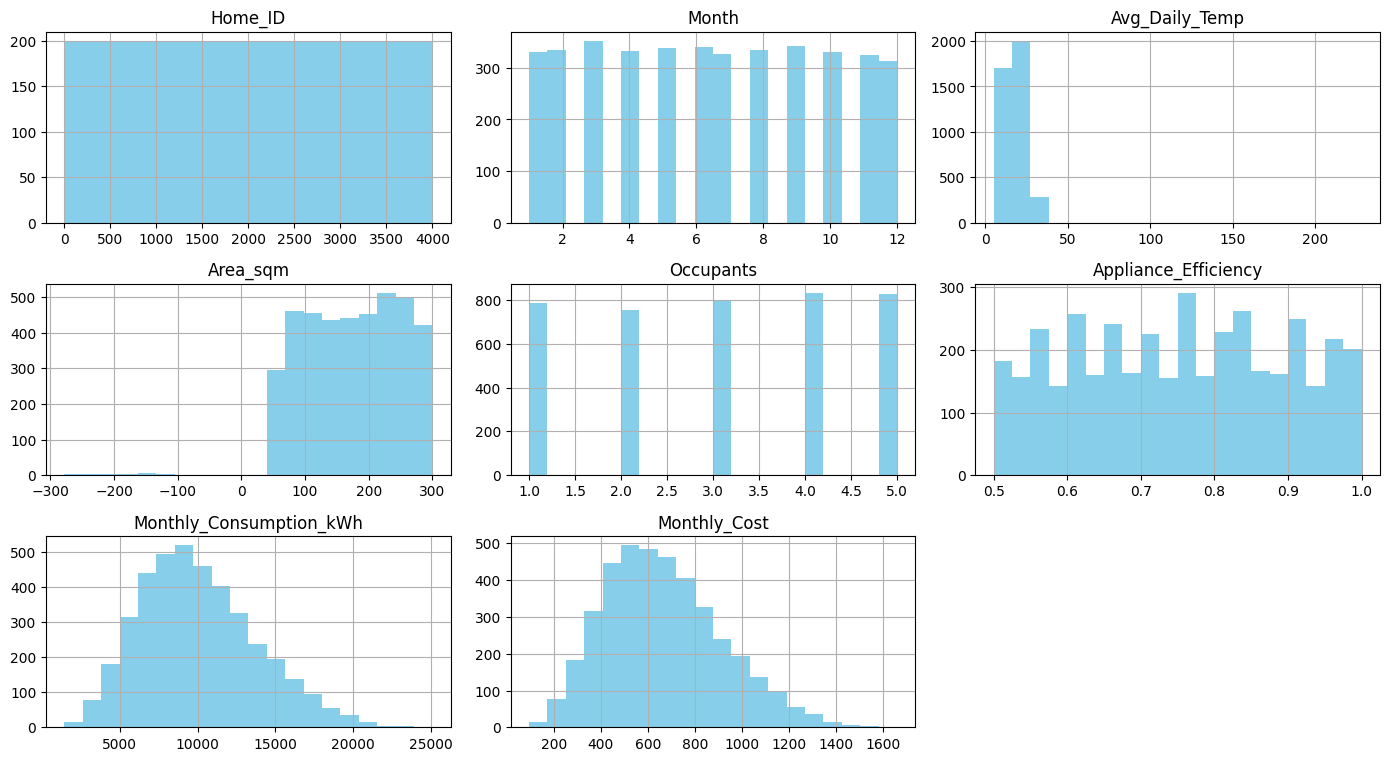

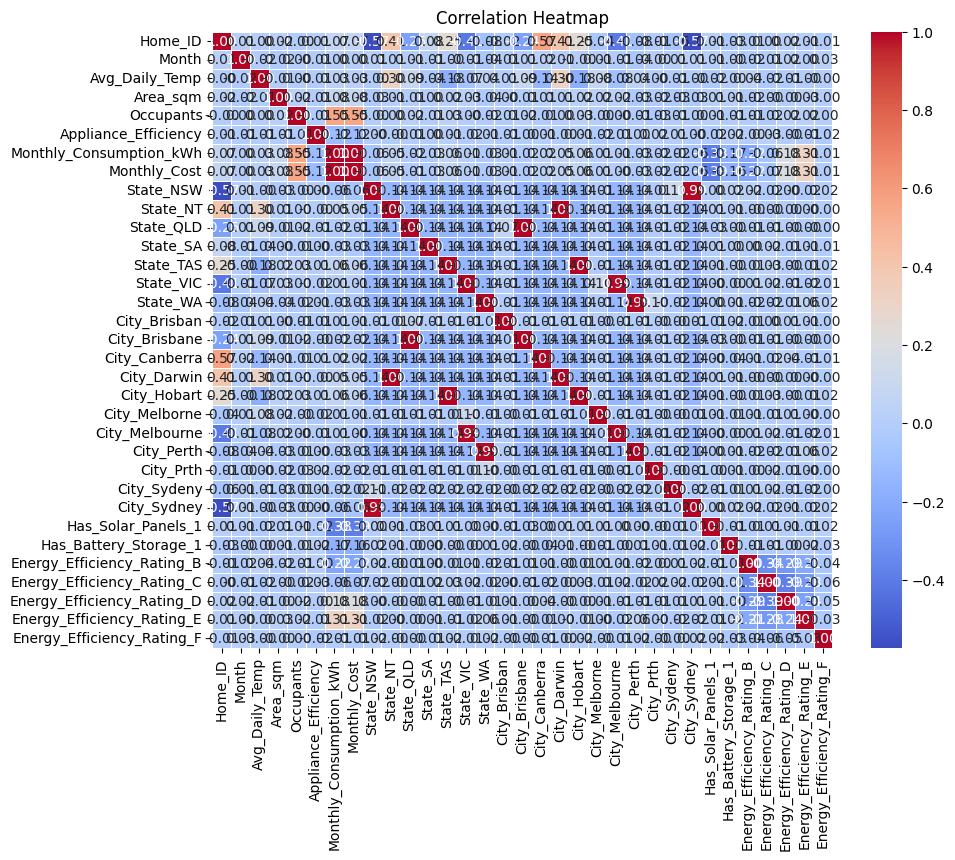

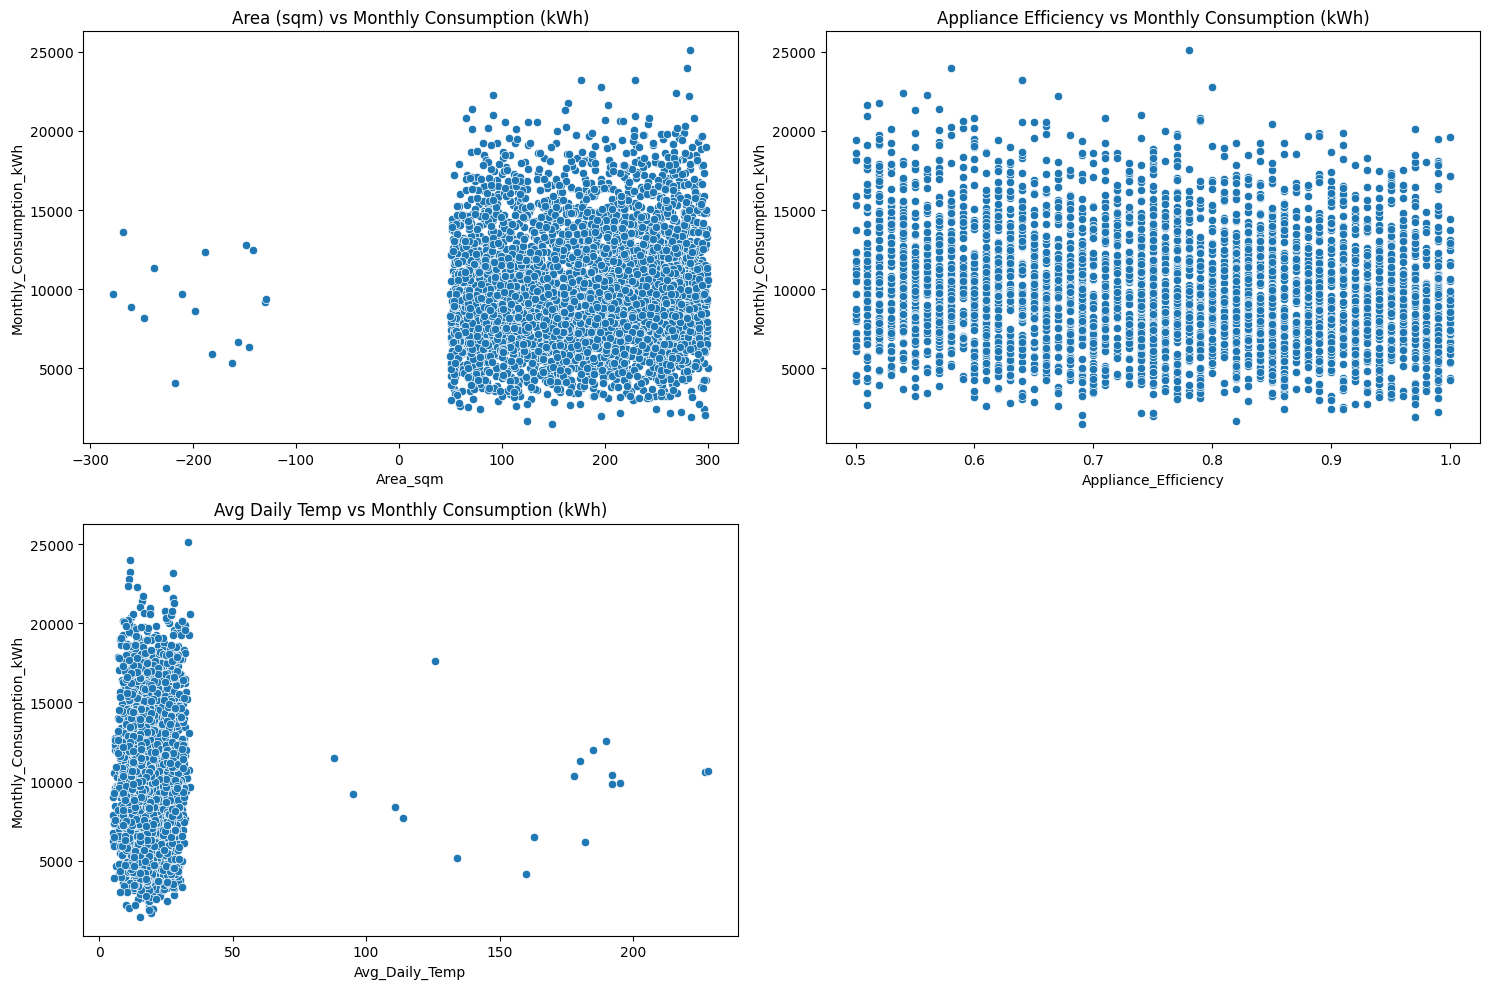

['Home_ID', 'Month', 'Avg_Daily_Temp', 'Area_sqm', 'Occupants', 'Appliance_Efficiency', 'Monthly_Consumption_kWh', 'Monthly_Cost', 'State_NSW', 'State_NT', 'State_QLD', 'State_SA', 'State_TAS', 'State_VIC', 'State_WA', 'City_Brisban', 'City_Brisbane', 'City_Canberra', 'City_Darwin', 'City_Hobart', 'City_Melborne', 'City_Melbourne', 'City_Perth', 'City_Prth', 'City_Sydeny', 'City_Sydney', 'Has_Solar_Panels_1', 'Has_Battery_Storage_1', 'Energy_Efficiency_Rating_B', 'Energy_Efficiency_Rating_C', 'Energy_Efficiency_Rating_D', 'Energy_Efficiency_Rating_E', 'Energy_Efficiency_Rating_F']


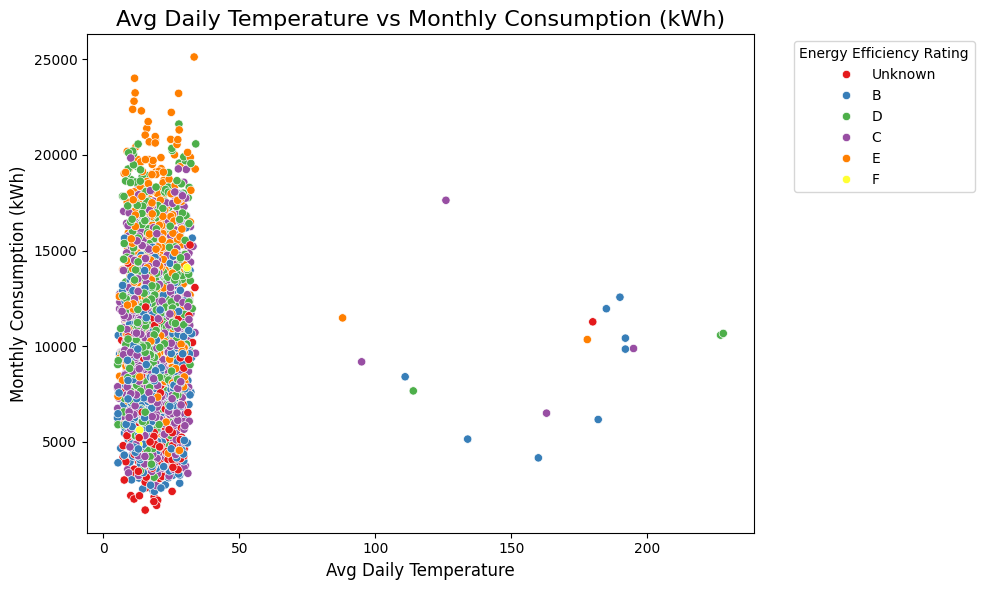

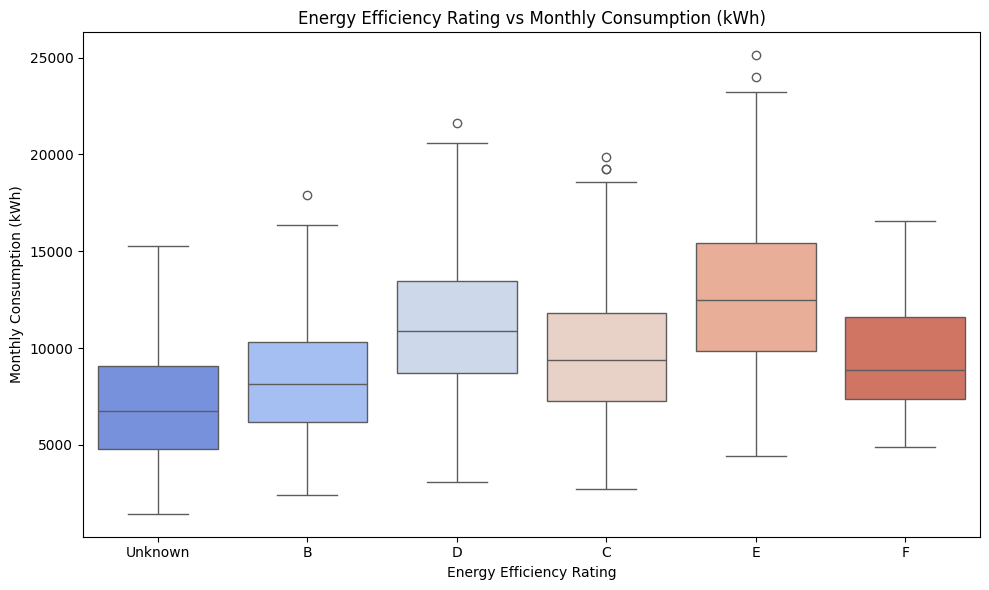

Shape of X_train_scaled: (3200, 37)
Shape of X_test_scaled: (800, 37)
Linear Regression - RMSE: 438.73, R²: 0.99
Ridge Regression - RMSE: 438.55, R²: 0.99
Lasso Regression - RMSE: 438.61, R²: 0.99
Top 10 Most Important Features:
           Feature  Coefficient
6     Monthly_Cost  3727.773442
0          Home_ID    82.733578
7        State_NSW    75.721161
12       State_VIC    58.906910
14    City_Brisban    40.776661
23     City_Sydeny    40.133677
9        State_QLD    39.408588
20  City_Melbourne    38.355754
24     City_Sydney    35.587484
19   City_Melborne    20.551157
Data cleaning complete: Fixed city names and removed 'Home_ID' and 'Monthly_Cost'.
One-hot encoding complete: Categorical variables encoded.
Data split into training and testing sets.
Scaling complete: Numerical features standardized.
Linear Regression model built and predictions made.
Ridge Regression model built and predictions made.
Lasso Regression model built and predictions made.
Linear Regression - RMSE: 438.

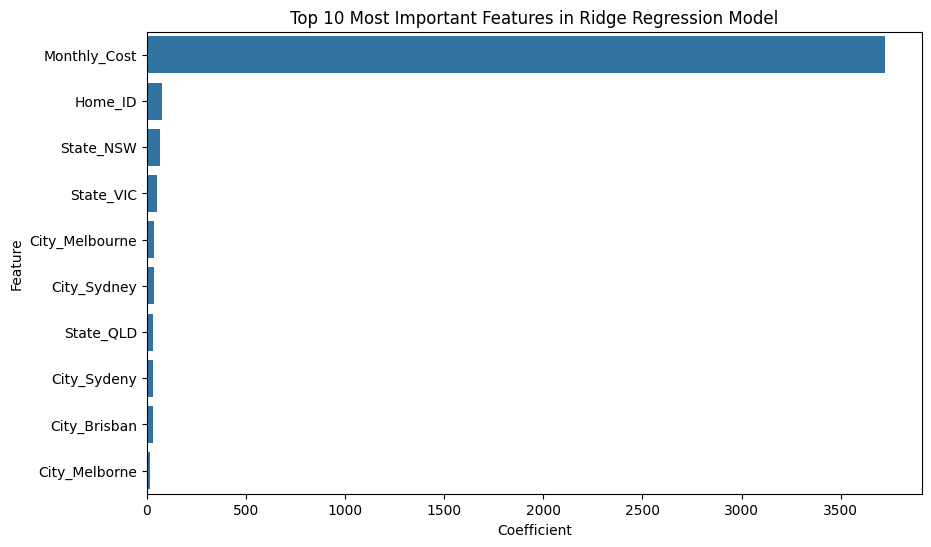

Ridge Regression Alpha: 1.0


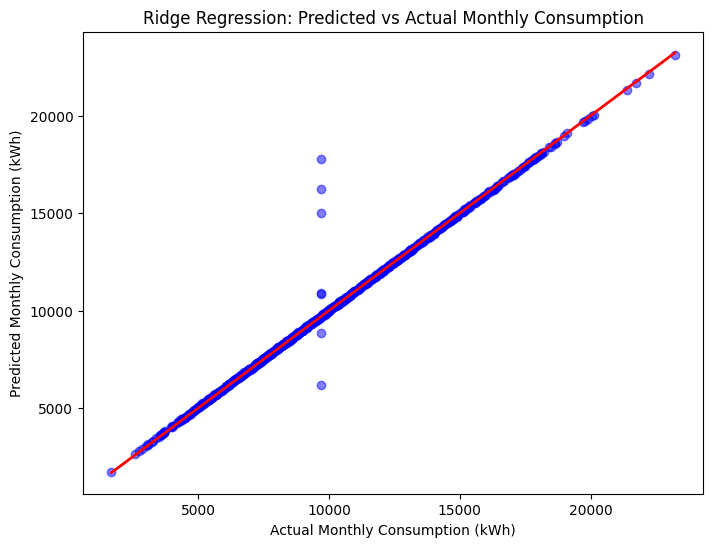

Model Summary:
Ridge Regression Alpha (Regularization Strength): 1.0
Final RMSE on Test Set: 438.55
Final R² on Test Set: 0.99
Cross-Validation RMSE: 285.56

Top 10 Features Driving the Model:
           Feature  Coefficient
6     Monthly_Cost  3723.678264
0          Home_ID    73.655307
7        State_NSW    64.501782
12       State_VIC    52.054381
20  City_Melbourne    36.383602
24     City_Sydney    33.422242
9        State_QLD    31.618716
23     City_Sydeny    31.079541
14    City_Brisban    30.630234
19   City_Melborne    15.670779


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = "C:/Users/mrhmc/Documents/ICT_706 ML/Task2/energy_consumption_dataset.csv"
df = pd.read_csv(file_path)


# Display the first few rows and basic information about the dataset
df_info = df.info()
df_head = df.head()

df_info, df_head

################################################################

# Handling missing values: Fill only numerical columns with the median
numerical_columns = df.select_dtypes(include=[np.number]).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

# For categorical columns, you can either drop or fill with a placeholder (e.g., 'Unknown' for strings)
categorical_columns = df.select_dtypes(include=[object]).columns
df[categorical_columns] = df[categorical_columns].fillna('Unknown')

# Check if there are any remaining missing values (Verify Handling missing values)
#print(df.isnull().sum())

# Convert categorical variables to dummy variables (One-Hot Encoding)
df = pd.get_dummies(df, columns=['State', 'City', 'Has_Solar_Panels', 'Has_Battery_Storage', 'Energy_Efficiency_Rating'], drop_first=True)

# After one-hot encoding, some columns are categorical, so we only plot the numerical columns.
numerical_columns = df.select_dtypes(include=[np.number]).columns

##########################################################################3
#exploratory data analysis (EDA)
##################################################################
# Descriptive statistics of the numerical features
stats_summary = df.describe()

# Setting up the figure size for plots
plt.figure(figsize=(12, 6))

# Plot histograms for numerical columns
df.hist(bins=20, figsize=(14, 10), layout=(4, 3), color='skyblue')
plt.tight_layout()
plt.show()

# Correlation matrix to examine relationships between variables
corr_matrix = df.corr()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Visualizing Avg_Daily_Temp vs Monthly_Consumption_kWh

# Creating scatter plots to visualize the relationships between key features and the target variable
plt.figure(figsize=(15, 10))

# Scatter plot for Area_sqm vs Monthly_Consumption_kWh
plt.subplot(2, 2, 1)
sns.scatterplot(x=df['Area_sqm'], y=df['Monthly_Consumption_kWh'])
plt.title('Area (sqm) vs Monthly Consumption (kWh)')

# Scatter plot for Appliance_Efficiency vs Monthly_Consumption_kWh
plt.subplot(2, 2, 2)
sns.scatterplot(x=df['Appliance_Efficiency'], y=df['Monthly_Consumption_kWh'])
plt.title('Appliance Efficiency vs Monthly Consumption (kWh)')

# Scatter plot for Avg_Daily_Temp vs Monthly_Consumption_kWh
plt.subplot(2, 2, 3)
sns.scatterplot(x=df['Avg_Daily_Temp'], y=df['Monthly_Consumption_kWh'])
plt.title('Avg Daily Temp vs Monthly Consumption (kWh)')

plt.tight_layout()
plt.show()
######################################################
print(df.columns.tolist())

df.columns = df.columns.str.strip()
df.columns
######################################################################

# Combine one-hot encoded columns into a single categorical column
def combine_ratings(row):
    if row['Energy_Efficiency_Rating_B'] == 1:
        return 'B'
    elif row['Energy_Efficiency_Rating_C'] == 1:
        return 'C'
    elif row['Energy_Efficiency_Rating_D'] == 1:
        return 'D'
    elif row['Energy_Efficiency_Rating_E'] == 1:
        return 'E'
    elif row['Energy_Efficiency_Rating_F'] == 1:
        return 'F'
    else:
        return 'Unknown'  # Handle cases where none of the columns are 1

# Apply the function to create a new 'Energy_Efficiency_Rating' column
df['Energy_Efficiency_Rating'] = df.apply(combine_ratings, axis=1)

# Check for missing values
#print(df['Energy_Efficiency_Rating'].isnull().sum())
 # Plot: Avg Daily Temperature vs Monthly Consumption with hue for Energy Efficiency Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg_Daily_Temp', y='Monthly_Consumption_kWh', hue='Energy_Efficiency_Rating', data=df, palette='Set1')

# Add labels and title
plt.title('Avg Daily Temperature vs Monthly Consumption (kWh)', fontsize=16)
plt.xlabel('Avg Daily Temperature', fontsize=12)
plt.ylabel('Monthly Consumption (kWh)', fontsize=12)
plt.legend(title='Energy Efficiency Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#############################################################

# Apply the function to create a new 'Energy_Efficiency_Rating' column
df['Energy_Efficiency_Rating'] = df.apply(combine_ratings, axis=1)

import seaborn as sns
import matplotlib.pyplot as plt
# Boxplot: Energy Efficiency Rating vs Monthly Consumption
plt.figure(figsize=(10, 6))
sns.boxplot(x='Energy_Efficiency_Rating', y='Monthly_Consumption_kWh', data=df, hue='Energy_Efficiency_Rating', palette='coolwarm', dodge=False)
plt.title('Energy Efficiency Rating vs Monthly Consumption (kWh)')
plt.xlabel('Energy Efficiency Rating')
plt.ylabel('Monthly Consumption (kWh)')
plt.tight_layout()
plt.show()
##########################
##############
############################################################################
#Data pre-processing for Modeling
############################################################################
##############
##########################

# Identify categorical columns that need encoding (including 'Energy_Efficiency_Rating')
categorical_columns = ['Energy_Efficiency_Rating', 'Has_Solar_Panels_1', 'Has_Battery_Storage_1']

# Apply One-Hot Encoding to categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Define the target variable (y) and feature variables (X)
X = df_encoded.drop(columns=['Monthly_Consumption_kWh'])  # Drop the target variable
y = df_encoded['Monthly_Consumption_kWh']  # Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize ONLY the numerical features (skip already encoded categorical columns)
numerical_columns = X_train.select_dtypes(include=[np.number]).columns

# Apply scaling only to numerical columns
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_train_scaled[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])

X_test_scaled = X_test.copy()
X_test_scaled[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Now your data should be fully numeric and ready for model building!


# Display shape of the scaled datasets
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)

########################
############################################
###########################################################
##########################################################################
#Model Building: Linear Regression, Ridge, and Lasso
# Now data is ready for model building!
#########################################################################
###########################################################
#############################################
#########################

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize the models
linear_reg = LinearRegression()
ridge_reg = Ridge(alpha=1.0)
lasso_reg = Lasso(alpha=0.1)

# Fit the Linear Regression model
linear_reg.fit(X_train_scaled, y_train)
y_pred_linear = linear_reg.predict(X_test_scaled)

# Fit the Ridge Regression model
ridge_reg.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_reg.predict(X_test_scaled)

# Fit the Lasso Regression model
lasso_reg.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_reg.predict(X_test_scaled)

# Function to evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - RMSE: {rmse:.2f}, R²: {r2:.2f}")

# Evaluate each model
evaluate_model(y_test, y_pred_linear, "Linear Regression")
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")

##############################
#################################
# Business relies on feature importance to anticipate energy use. Understanding these factors helps companies 
# make more practical decisions like reducing energy consumption.
# By understanding these elements, organisations may increase model comprehensibility and better explain their decisions to non-technical stakeholders.
# This feature-centric approach increases model interpretability and helps businesses make energy-use decisions.
#################################
##########################################

# Get feature importance from the Linear Regression model
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': linear_reg.coef_})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# Display the top 10 most important features
print("Top 10 Most Important Features:")
print(feature_importance.head(10))
################################################################################################################
# Clean the data (fix city name typos and remove irrelevant features)

# Fix Brisbane
df['City_Brisbane'] = df['City_Brisbane'] + df['City_Brisban']
df.drop(columns=['City_Brisban'], inplace=True)

# Fix Sydney
df['City_Sydney'] = df['City_Sydney'] + df['City_Sydeny']
df.drop(columns=['City_Sydeny'], inplace=True)

# Fix Melbourne
df['City_Melbourne'] = df['City_Melbourne'] + df['City_Melborne']
df.drop(columns=['City_Melborne'], inplace=True)

# Drop Home_ID and Monthly_Cost from the dataset
df_cleaned = df.drop(columns=['Home_ID', 'Monthly_Cost'])

print("Data cleaning complete: Fixed city names and removed 'Home_ID' and 'Monthly_Cost'.")
#################################################################################################################
#One-Hot Encoding

# Apply one-hot encoding to categorical columns
categorical_columns = ['Energy_Efficiency_Rating', 'State_NSW', 'State_QLD', 'State_SA', 
                       'State_VIC', 'State_WA', 'City_Brisbane', 'City_Melbourne', 
                       'City_Sydney']  # Add other categorical columns if needed

# One-hot encode the categorical columns
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_columns, drop_first=True)

print("One-hot encoding complete: Categorical variables encoded.")
#####################################################################################
#Train-Test Split and Scaling

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split into training and testing sets.")

# Standardize ONLY the numerical features (skip already encoded categorical columns)
numerical_columns = X_train.select_dtypes(include=[np.number]).columns

# Apply scaling only to numerical columns
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_train_scaled[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])

X_test_scaled = X_test.copy()
X_test_scaled[numerical_columns] = scaler.transform(X_test[numerical_columns])

print("Scaling complete: Numerical features standardized.")

########################################################################################
#Model Building and Evaluation

# Initialize the models
linear_reg = LinearRegression()
ridge_reg = Ridge(alpha=1.0)
lasso_reg = Lasso(alpha=0.1)

# Fit the Linear Regression model
linear_reg.fit(X_train_scaled, y_train)
y_pred_linear = linear_reg.predict(X_test_scaled)
print("Linear Regression model built and predictions made.")

# Fit the Ridge Regression model
ridge_reg.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_reg.predict(X_test_scaled)
print("Ridge Regression model built and predictions made.")

# Fit the Lasso Regression model
lasso_reg.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_reg.predict(X_test_scaled)
print("Lasso Regression model built and predictions made.")

# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - RMSE: {rmse:.2f}, R²: {r2:.2f}")

# Evaluate each model
evaluate_model(y_test, y_pred_linear, "Linear Regression")
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")

print("Model evaluation complete.")

#############
#############
##############
#Finalizing ModelRidge Model on Full Training Data
# Fit the Ridge Regression model (finalized model)
ridge_reg_final = Ridge(alpha=1.0)
ridge_reg_final.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_ridge_final = ridge_reg_final.predict(X_test_scaled)

# Evaluate the model on test data
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge_final))
r2 = r2_score(y_test, y_pred_ridge_final)

print(f"Final Ridge Regression Model - RMSE: {rmse:.2f}, R²: {r2:.2f}")

# Display the coefficients (feature importance)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': ridge_reg_final.coef_})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# Print the top 10 important features
print("Top 10 Most Important Features:")
print(feature_importance.head(10))

# Import cross-validation function
from sklearn.model_selection import cross_val_score

# Cross-validation for the finalized Ridge Regression model
ridge_reg_cv_scores = cross_val_score(ridge_reg_final, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate and print RMSE from cross-validation
ridge_reg_rmse_cv = np.sqrt(-ridge_reg_cv_scores).mean()
print(f"Final Ridge Regression Cross-Validation RMSE: {ridge_reg_rmse_cv:.2f}")

#############################
#Saving the Final Model
####
######
##########
##############
import joblib

# Save the final Ridge Regression model to a file
joblib.dump(ridge_reg_final, 'final_ridge_regression_model.pkl')
print("Model saved as 'final_ridge_regression_model.pkl'")

########
# Load the saved model
#ridge_reg_final_loaded = joblib.load('final_ridge_regression_model.pkl')
#print("Model loaded successfully.")

#Model Performance Reporting
#Code to Save Feature Importance and Metrics
# Save the feature importance to a CSV file
feature_importance.to_csv('feature_importance.csv', index=False)
print("Feature importance saved as 'feature_importance.csv'.")

# Save model performance metrics to a text file
with open('model_performance.txt', 'w') as f:
    f.write(f"Final Ridge Regression Model - RMSE: {rmse:.2f}, R²: {r2:.2f}\n")
    f.write(f"Final Ridge Regression Cross-Validation RMSE: {ridge_reg_rmse_cv:.2f}")
print("Model performance metrics saved as 'model_performance.txt'.")
############################################################################
# Hyperparameter Tuning 
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for Ridge Regression
param_grid = {'alpha': [0.1, 1, 10, 100]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Best alpha value from grid search
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha from GridSearchCV: {best_alpha}")

# Train the final model using the best alpha value
ridge_reg_best = Ridge(alpha=best_alpha)
ridge_reg_best.fit(X_train_scaled, y_train)

#Display Feature Importance (Model Coefficients)

# Display the coefficients (feature importance) of the finalized Ridge Regression model
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': ridge_reg_final.coef_})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# Display the feature importance
print("Top 10 Most Important Features in the Ridge Regression Model:")
print(feature_importance.head(10))

# Visualize the feature importance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features in Ridge Regression Model')
plt.show()
#Display Model Hyperparameters
# Display the value of the alpha hyperparameter (regularization strength)
print(f"Ridge Regression Alpha: {ridge_reg_final.alpha}")
# Plot Predictions vs Actual Values

# Plot predictions vs actual values for Ridge Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge_final, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('Ridge Regression: Predicted vs Actual Monthly Consumption')
plt.xlabel('Actual Monthly Consumption (kWh)')
plt.ylabel('Predicted Monthly Consumption (kWh)')
plt.show()


################################################
# Summary of the final Ridge Regression model
print("Model Summary:")
print(f"Ridge Regression Alpha (Regularization Strength): {ridge_reg_final.alpha}")
print(f"Final RMSE on Test Set: {rmse:.2f}")
print(f"Final R² on Test Set: {r2:.2f}")
print(f"Cross-Validation RMSE: {ridge_reg_rmse_cv:.2f}")

# Display the top 10 most important features
print("\nTop 10 Features Driving the Model:")
print(feature_importance.head(10))



In [ ]:
`